# APT-38 Threat Hunt


|               |    |
|:--------------|:---|
| Group         | G0082 |
| Description   | APT38 is a North Korean state-sponsored threat group that specializes in financial cyber operations; it has been attributed to the Reconnaissance General Bureau.[1] Active since at least 2014, APT38 has targeted banks, financial institutions, casinos, cryptocurrency exchanges, SWIFT system endpoints, and ATMs in at least 38 countries worldwide. Significant operations include the 2016 Bank of Bangladesh heist, during which APT38 stole $81 million, as well as attacks against Bancomext (2018) and Banco de Chile (2018); some of their attacks have been destructive |
| Reference        | [APT38 in MITRE ATT&CK](https://attack.mitre.org/groups/G0082/) |
    

## Hypothesis
APT-38 is tragetting Bullish environment and able to compromise some systems



## APT-38 TTP Matrix

In [4]:
# Importing Libraries
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet, HoverTool
from bokeh.transform import dodge
import pandas as pd

# You need to run this code at the beginning in order to show visualization using Jupyter Notebooks
from bokeh.io import output_notebook
output_notebook()
apt38= pd.read_json('/home/ak/Desktop/Jupyter Files/apt38.json')


#Showing visualization
show(apt38)

Loading BokehJS ...

ValueError: arrays must all be same length

## for inserting image

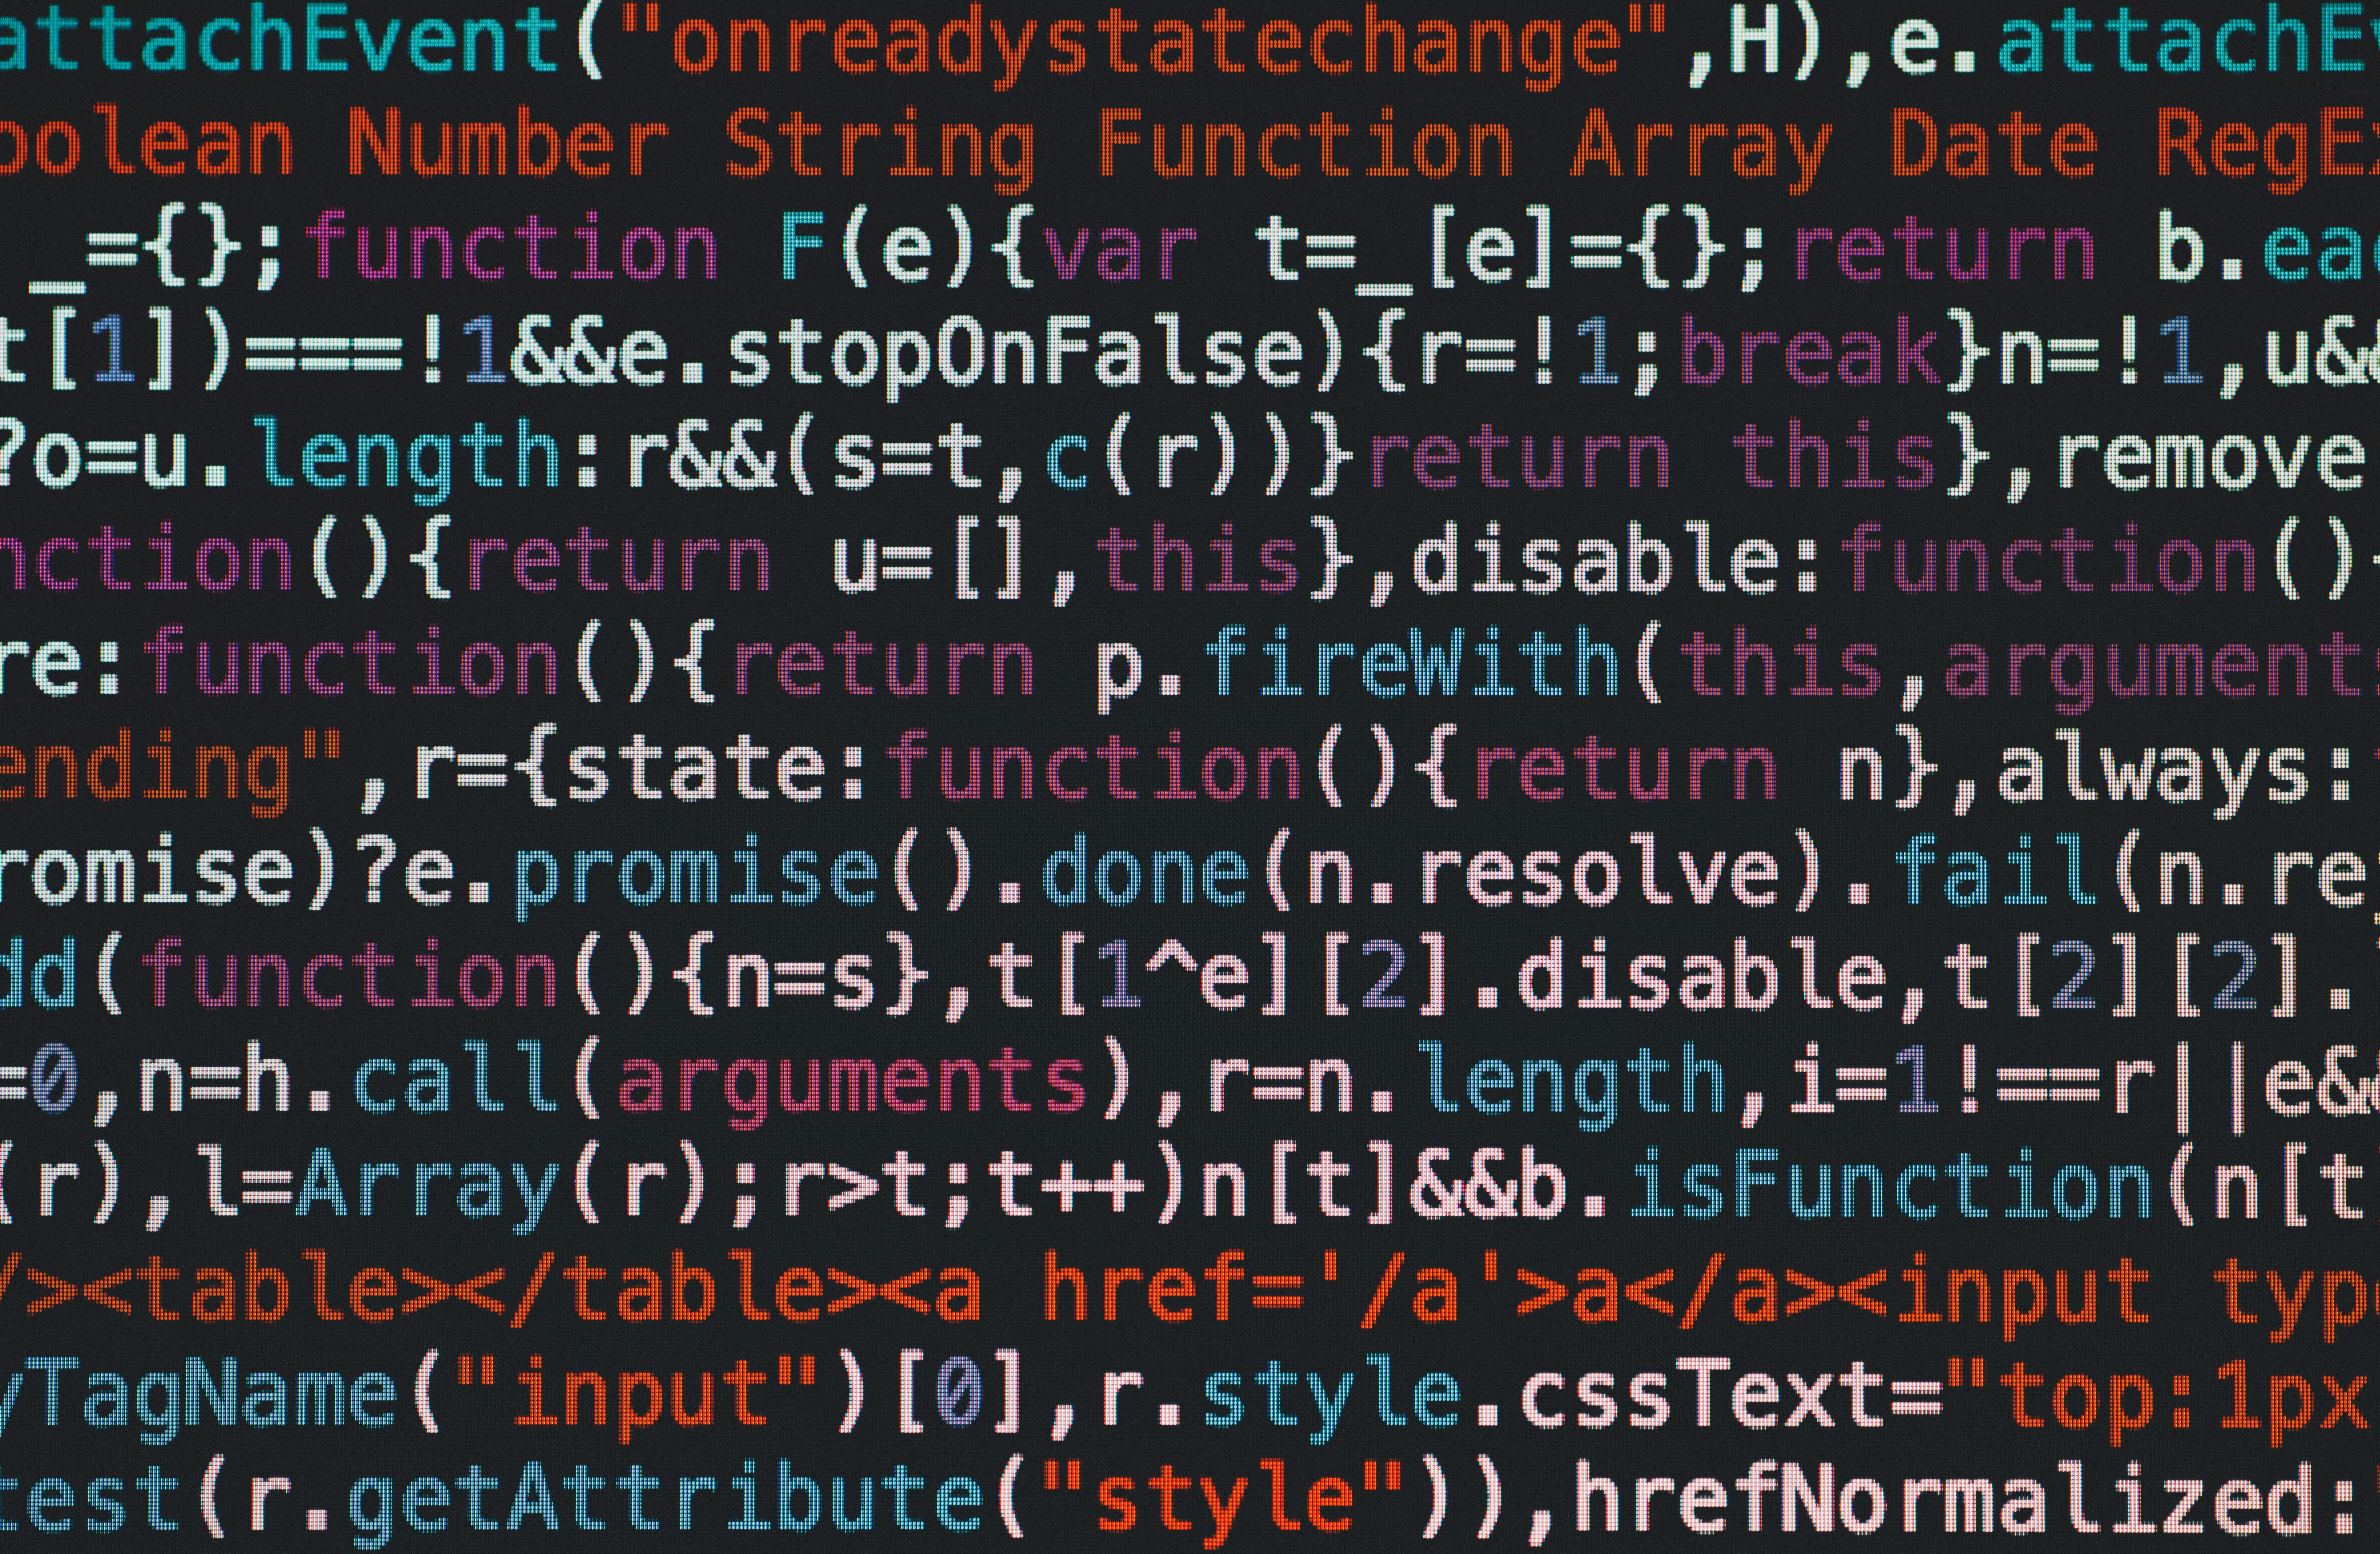

In [6]:
from IPython.display import Image
Image(filename='test.jpg')

![test](test.jpg "Test")

## Telemetry Detection Category  << Later update the below Code>>

In [1]:
# Importing Libraries
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet, HoverTool
from bokeh.transform import dodge
import pandas as pd

# You need to run this code at the beginning in order to show visualization using Jupyter Notebooks
from bokeh.io import output_notebook
output_notebook()
apt29= pd.read_json('https://raw.githubusercontent.com/OTRF/ThreatHunter-Playbook/master/docs/evals/apt29/data/otr_results.json')
summary = (
    apt29
    .groupby(['step','stepname']).agg(total=pd.NamedAgg(column="substep", aggfunc="nunique"))
    .join(
        apt29[apt29['detectiontype'] == 'Telemetry']
        .groupby(['step','stepname']).agg(telemetry=pd.NamedAgg(column="vendor", aggfunc="count"))
    )
).reset_index()
summary['percentage'] = (summary['telemetry'] / summary['total']).map("{:.0%}".format)
# Get Total Average Telemetry coverage
total_avg_percentage = '{0:.0f}'.format((summary['telemetry'].sum() / summary['total'].sum() * 100))

# Lists of values to create ColumnDataSource
stepname = summary['stepname'].tolist()
total = summary['total'].tolist()
telemetry = summary['telemetry'].tolist()
percentage = summary['percentage'].tolist()

# Creating ColumnDataSource object: source of data for visualization
source = ColumnDataSource(data={'stepname':stepname,'sub-Steps':total,'covered':telemetry,'percentage':percentage})

# Defining HoverTool object (Display info with Mouse): It is applied to chart named 'needHover'
hover_tool = HoverTool(names = ['needHover'],tooltips = [("Covered", "@covered"),("Percentage", "@percentage")])

# Creating Figure
p = figure(x_range=stepname,y_range=(0,23),plot_height=550,plot_width=600,toolbar_location='right',tools=[hover_tool])

# Creating Vertical Bar Charts
p.vbar(x=dodge('stepname',0.0,range=p.x_range),top='sub-Steps',width=0.7,source=source,color="#c9d9d3",legend_label="Total")
p.vbar(x=dodge('stepname',0.0, range=p.x_range),top='covered',width=0.7,source=source,color="#718dbf",legend_label="Covered", name = 'needHover')

# Adding Legend
p.legend.location = "top_right"
p.legend.orientation = "vertical"
p.legend.border_line_width = 3
p.legend.border_line_color = "black"
p.legend.border_line_alpha = 0.3

# Adding Title
p.title.text = 'Telemetry Detection Category (Average Coverage: {}%)'.format(total_avg_percentage)
p.title.align = 'center'
p.title.text_font_size = '12pt'

# Adding Axis Labels
p.xaxis.axis_label = 'Emulation Steps'
p.xaxis.major_label_orientation = 45

p.yaxis.axis_label = 'Count of Sub-Steps'

# Adding Data Label: Only for total of sub-steps
total_label = LabelSet(x='stepname',y='sub-Steps',text='sub-Steps',text_align='center',level='glyph',source= source)
p.add_layout(total_label)

#Showing visualization
show(p)

Loading BokehJS ...

## Import Libraries  << Add other libraries if required >>

In [ ]:
from pyspark.sql import SparkSession

## Start Spark Session  <<<< Change to Splunk Configs>>>>

In [ ]:
spark = SparkSession.builder.getOrCreate()
spark.conf.set("spark.sql.caseSensitive", "true")

## Analytics

## APT-38 related Hashes IOCs
**Data Sources:** Crowdstrike Telemetry

**Detection Type:** Query on Crowdstrike logs 

**Criteria:** Check for any hits in last 3 months 


**Enter the Hashe Value(s):**

Note: Enter multiple Hashes in CSV format

<<<<   >>>>  Hashes entry text box

**Query:**
<<<<   >>>>  Enter the Splunk Query to search for hashes

**Query Result:**
<<<<   >>>> Show the Hits in a tabular format


**Hashes Query Outcome Observation:** 
<<<  >>> Text Box

## APT-38 related IP address IOCs
**Data Sources:** Darktrace \ Connection Telemetry

**Detection Type:** Query on conenction logs 

**Criteria:** Check for any hits in last 3 months 


**Enter the IP address(es) :**

Note: Enter multiple IPs in CSV format

<<<<   >>>>  IP address entry text box

**Query:**
<<<<   >>>>  Enter the Splunk Query to search for connections toward the known IPs

**Query Result:**
<<<<   >>>> Show the Hits in a tabular format


**IP Address Query Outcome Observation:** 
<<<  >>> Text Box

## APT-38 related Domain IOCs
**Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 


**Enter the Domain(s):**

Note: Enter multiple Domain in CSV format

<<<<   >>>>  Domain entry text box

**Query:**
<<<<   >>>>  Enter the Splunk Query to search for hits toward the IOC Domain(s)

**Query Result:**
<<<<   >>>> Show the Hits in a tabular format


**IOC Domain Query Outcome Observation:** 
<<<  >>> Text Box

##  Host Artifacts based Hunt
**Objective :**

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**




##  Network Artifacts based Hunt
**Objective :**

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**




##  Adversary Tools based Hunt
**Objective :**

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**




##  APT-38 TTPs based Hunt

### 1. Drive-by Compromise
**Objective :**


**Tactic:** Initial Access (TA0001)
### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**






### 2. Spearphishing Attachment (T1566.001)
**Objective :**

**Tactic:** Initial Access (TA0001)

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**






### 3. Native API (T1106)
**Objective :**

**Tactic:** Execution (TA0002)

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**






### 4. PowerShell (T1059.001) (Command and Scripting Interpreter)
**Objective :**

**Tactic:** Execution (TA0002)

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**






### 5. Visual Basic (T1059.005) (Command and Scripting Interpreter)
**Objective :**

**Tactic:** Execution (TA0002)
### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**






### 6. Windows Command Shell (T1059.003) (Command and Scripting Interpreter)
**Objective :**

**Tactic:** Execution (TA0002)

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**






### 7. Cron (T1053.003)  (Scheduled Task/Job - T1053)
**Objective :**

**Tactic:** Execution (TA0002)

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**






### 8. Scheduled Task (T1053.005) (Scheduled Task/Job - T1053)
**Objective :**

**Tactic:** Execution (TA0002)

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**






### 9. Service Execution (T1569.002) (System Services - T1569)
**Objective :**

**Tactic:** Execution (TA0002)

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**






### 10. Malicious File (T1204.002) (User Execution- T1204)
**Objective :**

**Tactic:** Execution (TA0002)

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**






### 11. Windows Service (T1543.003) (Create or Modify System Process- T1543)
**Objective :**

**Tactic:** Privilege Escalation (TA0004)

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**






### 12. Modify Registry (T1112)
**Objective :**

**Tactic:** Defense Evasion (TA0005)

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**






### 13. Disable or Modify System Firewall (T1562.004) (Impair Defenses- T1562)
**Objective :**

**Tactic:** Defense Evasion (TA0005)

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**






### 14. Impair Command History Logging (T1562.003) (Impair Defenses- T1562)
**Objective :**

**Tactic:** Defense Evasion (TA0005)

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | A 4663 EventID is logged| | This event is too vague, you need another characteristics to support the investigation |
|2   | The file accessed is browser's password database || |
|3   | The program that accessed the browser is not related to any browser | | Note every browser's default directory, and see if it's related|
|4   | AccessList is 4416 || This access code means that the program is simply reading the data, not writing it|


**Log Requirements \ Data Sources:** Darktrace & Network connection related Telemetry

**Detection Type:** Query on splunk logs 

**Criteria:** Check for any hits in last 3 months 

**References**




### Detection Type:Telemetry(None)

### Detection Type:None(None)

### Detection Type:Telemetry(Correlated)

### Detection Type:technique(alert)

### Detection Type:General(Correlated)

### Detection Type:technique(Alert)